In [3]:
import pandas as pd
Data = pd.read_csv(r"C:\Users\DREAM\Desktop\New_Data.csv")

In [4]:
Data.head()

,City,Area,Price
0,Ahmedabad,2000,25000
1,Mansa,4000,45000
2,Gandhinagar,6000,65000
3,Ahmedabad,8000,85000
4,Mansa,10000,150000


In [5]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
City     12 non-null object
Area     12 non-null int64
Price    12 non-null int64
dtypes: int64(2), object(1)
memory usage: 280.0+ bytes


In [6]:
Data.describe()

,Area,Price
count,12.000000,12.000000
mean,5500.000000,67500.000000
std,2969.542358,43874.821937
min,2000.000000,25000.000000
25%,3500.000000,40000.000000
50%,5000.000000,55000.000000
75%,8000.000000,85000.000000
max,10000.000000,150000.000000


In [7]:
import seaborn as sns
%matplotlib inline

C:\Users\DREAM\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


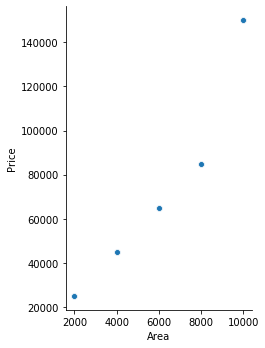

In [8]:
sns.pairplot(Data, x_vars=['Area'],y_vars='Price', size=5,aspect=0.7, kind='scatter')

In [9]:
#Preparing x and Y

In [10]:
x = Data['Area']
x.head()

0     2000
1     4000
2     6000
3     8000
4    10000
Name: Area, dtype: int64

In [11]:
y = Data['Price']
y.head()

0     25000
1     45000
2     65000
3     85000
4    150000
Name: Price, dtype: int64

In [12]:
#Splitting the Data into Training and testing sets

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=100)

In [14]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8,)
(8,)
(4,)
(4,)


In [15]:
import numpy as np

In [16]:
x_train = x_train[:,np.newaxis]
x_test = x_test[:,np.newaxis]

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8, 1)
(4, 1)
(8,)
(4,)


In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
print(lr.intercept_)
print(lr.coef_)

-7857.142857142899
[13.21428571]


#y = -7857.142+13.214 * price

# Predictions

In [20]:
y_pred = lr.predict(x_test)

In [21]:
type(y_pred)

numpy.ndarray

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [24]:
mse
r_squared

0.9269602577873256

In [25]:
import statsmodels.api as sm

In [26]:
x_train_sm = x_train
#unlike sklearn, statsmodel don't automatically fit a constant,
#so you need to use the method sn.add_constant(x) in order to add a constant
x_train_sm= sm.add_constant(x_train_sm)
#create a fitted model in one line
lm_1 = sm.OLS(y_train,x_train_sm).fit()

# print the coefficients
lm_1.params

const   -7857.142857
x1         13.214286
dtype: float64

In [27]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     53.87
Date:                Sat, 15 Feb 2020   Prob (F-statistic):           0.000327
Time:                        12:06:01   Log-Likelihood:                -86.511
No. Observations:                   8   AIC:                             177.0
Df Residuals:                       6   BIC:                             177.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7857.1429   1.15e+04     -0.686      0.5

C:\Users\DREAM\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [28]:
# std err is should be lover 
# P>|t| (p-value) 
# p value is more then 0.05 then we fail to reject the H0(null) Hypothesis means we will accept the H0(null) 